In [1]:
%pylab inline
from scipy.special import factorial
from scipy.optimize import curve_fit
# time interval for all counts is 0.9s
def G(x,s,p):
    return 300*1.0/(2*pi*s**2)**0.5*e**(0-(x-p)**2/(2*s**2)) # gaussian distribution

def Gm(x):
    return 300*1.0/(2*pi*s**2)**0.5*e**(0-(x-mp)**2/(2*s**2)) #minimized gaussian

def G1(x,s):
    return 300*1.0/(2*pi*s**2)**0.5*e**(0-(x-mp)**2/(2*s**2)) #minimized gaussian

def P(x):
    return 300*p**x/factorial(x)*np.exp(-p) #poisson distribution

def Pm(x):
    return 300*mp**x/factorial(x)*np.exp(-mp)    #minimized possion

Populating the interactive namespace from numpy and matplotlib


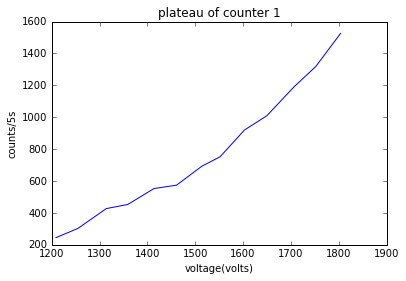

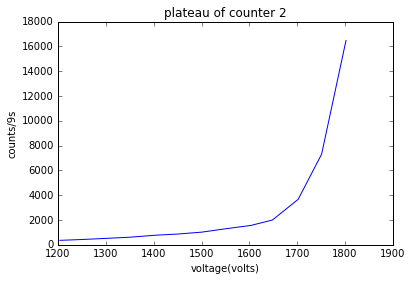

In [2]:
figure(1)
x=array([1209,1255,1314,1359,1414,1461,1514,1552,1603,1650,1706,1752,1804])
y=array([245,303,427,453,553,574,693,752,920,1010,1189,1318,1526])
plt.plot(x,y)
plt.ylabel('counts/5s')
plt.xlabel('voltage(volts)')
plt.title('plateau of counter 1')
figure(2)
x=array([1204,1249,1301,1350,1404,1449,1500,1551,1603,1648,1702,1751,1802])
y=array([360,426,520,612,774,865,1019,1297,1561,1996,3667,7308,16476])
plt.plot(x,y)
plt.ylabel('counts/9s')
plt.xlabel('voltage(volts)')
plt.title('plateau of counter 2')

count numbers : [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58]
observed times: [ 1  2  1  2  1  3  3  8  4  8 15 14  9 15 17 20 22 15 18 16 21 15 14 12  9
  6  9  6  8  3  1  1  0  1]
the mean value is: 41.91
the standard deviation is : 6.17591288799
[ 41.6   41.61  41.62  41.63  41.64  41.65  41.66  41.67  41.68  41.69
  41.7   41.71  41.72  41.73  41.74  41.75  41.76  41.77  41.78  41.79
  41.8   41.81  41.82  41.83  41.84  41.85  41.86  41.87  41.88  41.89
  41.9   41.91  41.92  41.93  41.94  41.95  41.96  41.97  41.98  41.99  42.
  42.01  42.02  42.03  42.04  42.05  42.06  42.07  42.08  42.09  42.1
  42.11  42.12  42.13  42.14  42.15  42.16  42.17  42.18  42.19  42.2
  42.21  42.22  42.23  42.24  42.25  42.26  42.27  42.28  42.29  42.3
  42.31  42.32  42.33  42.34  42.35  42.36  42.37  42.38  42.39  42.4 ]
[ 22.67798157  22.62093905  22.56543945  22.51148133  22.45906329
  22.40818392  22.35884186  22.31103577  22.26476432  

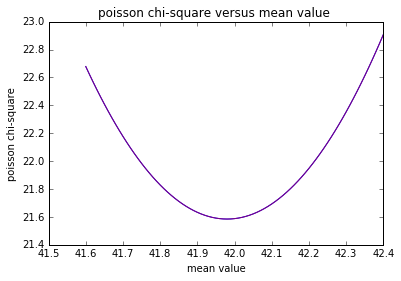

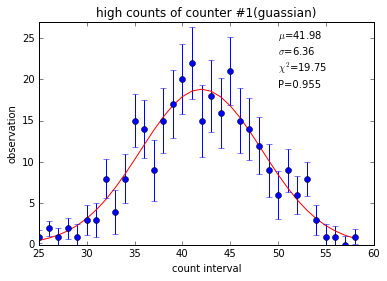

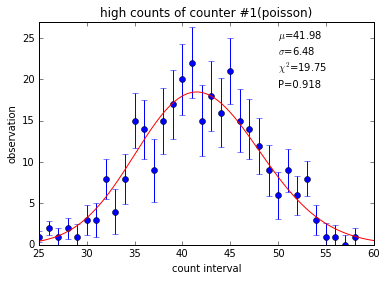

In [3]:
# high counts of single tube
arr=genfromtxt("counterh.txt")
arr=arr.astype(int)
m=amax(arr)
n=amin(arr)
h= m-n+1

b=[]
c=linspace(n,m,h)               # c reprensents count number
c=c.astype(int)
print 'count numbers :',c
for i in range(n,m+1):
    a=0
    for j in range(0,300):
        if arr[j]==i:
            a=a+1 
    b.append(a)
b=array(b)                       # number of observation
print 'observed times:',b

mean = sum(arr)/300.0                  # the mean value
print 'the mean value is:',mean
standard = std(arr)
print 'the standard deviation is :',standard # the standard deviation

k=linspace(41.6,42.4,81)                      
k=array(k)                              #create the mean value array 
print k


chips=[]                                      #create the chi-square array
for i in range(0,81):
    p=k[i]
    chi=array(((b-P(c))**2/P(c)))               
    chis=sum(chi)
    chips.append(chis)
chips=array(chips)                            
print chips 

chipsm=amin(chips)                                  #find out the minimum chi-square
print 'the minimized chisquare of poisson:',chipsm
q=where(chips==chipsm)[0][0]                        #find the minimum chi-square in the chi-square array
mp=k[q]
print 'the mean value (minimum chi-square) :',mp   

figure(1)                                         # plot chi-square vs mean 
x=k
y=chips
plt.plot(x,y)
plt.plot(x, y,color='purple')
plt.xlabel('mean value')
plt.ylabel('poisson chi-square')
plt.title('poisson chi-square versus mean value ')

figure(2)
x=c
y=b
para, unc = curve_fit(G1, x, y, p0=[1],maxfev=1000000000)
z=array(G1(x, *para))
plt.plot(x, z, 'r-')
plt.title('high counts of counter #1(guassian)')
chig=array(((b-z)**2/z))
chigs=sum(chig)
print 'the gaussian chi-square is:',chigs
print 'the square root of mp is:',sqrt(mp)
print 'standard deviatition of gaussain is:',round(para[0],2),'+/-',round(sqrt(diag(unc))[0],2)

yerr=sqrt(z)
plt.errorbar(x,y,yerr,fmt='o',color='blue')
plt.axis([25,60, 0, 27])

plt.xlabel('count interval')
plt.ylabel('observation')

plt.text(50,25,r'$\mu $=%s' % mp)
plt.text(50,23,r'$\sigma$=%s' %6.36)
plt.text(50,21,r'$\chi^2$=%s' %19.75)
plt.text(50,19,'P=0.955')

figure(3)                                     #plot the poisson fit

plt.title('high counts of counter #1(poisson)')
x=c
y=b
yerr=sqrt(Pm(x))
plt.errorbar(x,y,yerr,fmt='o',color='blue')
plt.axis([25,60, 0, 27])

x = linspace(25,60,1000)
y=Pm(x) #possion distribution
plt.plot(x, y,color='red')
plt.xlabel('count interval')
plt.ylabel('observation')
print 'the degree of freedom is:', len(c)-2
plt.text(50,25,r'$\mu $=%s' % mp)
plt.text(50,23,r'$\sigma$=%s' %6.48)
plt.text(50,21,r'$\chi^2$=%s' %19.75)
plt.text(50,19,'P=0.918')


count numbers : [0 1 2 3 4 5 6 7 8 9]
observed times: [ 8 36 58 51 64 50 22  7  3  1]
the mean value is: 3.41666666667
the standard deviation is : 1.73869363476
[ 3.3   3.31  3.32  3.33  3.34  3.35  3.36  3.37  3.38  3.39  3.4   3.41
  3.42  3.43  3.44  3.45  3.46  3.47  3.48  3.49  3.5   3.51  3.52  3.53
  3.54  3.55  3.56  3.57  3.58  3.59  3.6 ]
[ 12.55556324  12.29196319  12.0465635   11.81918674  11.60966031
  11.41781626  11.24349127  11.08652648  10.94676744  10.824064
  10.71827019  10.62924418  10.55684815  10.50094823  10.46141441
  10.43812047  10.43094387  10.43976573  10.46447069  10.50494691
  10.56108593  10.63278267  10.71993532  10.82244529  10.94021714
  11.07315854  11.22118021  11.38419584  11.56212206  11.75487837
  11.9623871 ]
the minimized chisquare of poisson: 10.4309438716
the mean value (minimum chi-square) : 3.46
the standard deviation is: 1.86010752377
the gaussian chi-square is: 10.8687964839
the degree of freedom is: 9


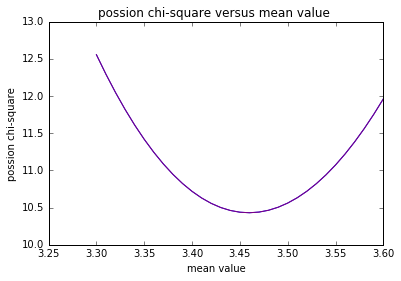

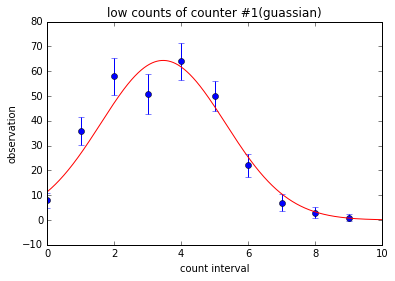

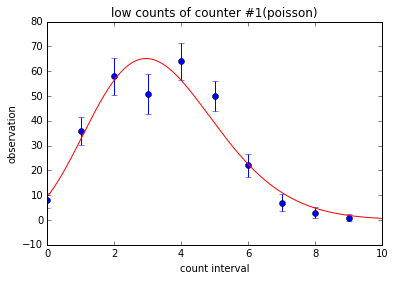

In [4]:

# low counts of single tube
arr=genfromtxt("counterl.txt")
arr=arr.astype(int)
m=amax(arr)
n=amin(arr)
h= m-n+1                      # h reprensents bins
b=[]
b_m=[]
c=linspace(n,m,h)             # c reprensents count number
c=c.astype(int)
print 'count numbers :',c
for i in range(n,m+1):
    a=0
    for j in range(0,300):
        if arr[j]==i:
            a=a+1 
    b.append(a)
    
b=array(b)                     # number of observation
print 'observed times:',b


mean = sum(arr)/300.0                  # the mean value
print 'the mean value is:',mean
standard = std(arr)
print 'the standard deviation is :',standard # the standard deviation

k=linspace(3.3,3.6,31)
k=array(k)
print k


chips=[]
for i in range(0,31):
    p=k[i]
    chi=array(((b-P(c))**2/P(c)))
    chis=sum(chi)
    chips.append(chis)
chips=array(chips)
print chips

chipsm=amin(chips)
print 'the minimized chisquare of poisson:',chipsm
q=where(chips==chipsm)[0][0]
mp=k[q]
print 'the mean value (minimum chi-square) :',mp

figure(1)
x=k
y=chips
plt.plot(x,y)
plt.plot(x, y,color='purple')
plt.xlabel('mean value')
plt.ylabel('possion chi-square')
plt.title('possion chi-square versus mean value ')

figure(2)
s=(mp)**0.5
print 'the standard deviation is:',s
plt.title('low counts of counter #1(guassian)')
chig=array(((b-Gm(c))**2/Gm(c)))
chigs=sum(chig)
print 'the gaussian chi-square is:',chigs

x=c
y=b
yerr=sqrt(Pm(x))
plt.errorbar(x,y,yerr,fmt='o',color='blue')

x = linspace(0,10,1000)
y=Gm(x) 
plt.plot(x, y,color='red')
plt.xlabel('count interval')
plt.ylabel('observation')

figure(3)

plt.title('low counts of counter #1(poisson)')
x=c
y=b
yerr=sqrt(Pm(x))
plt.errorbar(x,y,yerr,fmt='o',color='blue')

x = linspace(0,10,1000)
y=Pm(x) #possion distribution
plt.plot(x, y,color='red')
plt.xlabel('count interval')
plt.ylabel('observation')
print 'the degree of freedom is:', len(c)-1

count numbers:  [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 60]
[ 2  0  1  2  1  5  2  4  9 14 15 12  6  7  8  8 20 19 19 13 12 17 18  8 10
 12  9 16  7 10  5  3  2  4]
the mean value is: 44.3066666667
the standard deviation is : 7.15583367299
[ 43.7   43.71  43.72  43.73  43.74  43.75  43.76  43.77  43.78  43.79
  43.8   43.81  43.82  43.83  43.84  43.85  43.86  43.87  43.88  43.89
  43.9   43.91  43.92  43.93  43.94  43.95  43.96  43.97  43.98  43.99  44.
  44.01  44.02  44.03  44.04  44.05  44.06  44.07  44.08  44.09  44.1
  44.11  44.12  44.13  44.14  44.15  44.16  44.17  44.18  44.19  44.2
  44.21  44.22  44.23  44.24  44.25  44.26  44.27  44.28  44.29  44.3
  44.31  44.32  44.33  44.34  44.35  44.36  44.37  44.38  44.39  44.4
  44.41  44.42  44.43  44.44  44.45  44.46  44.47  44.48  44.49  44.5 ]
[ 80.78771147  80.70939982  80.63343382  80.55981029  80.48852611
  80.4195782   80.35296351  80.28867904  80.22672182  80.167088

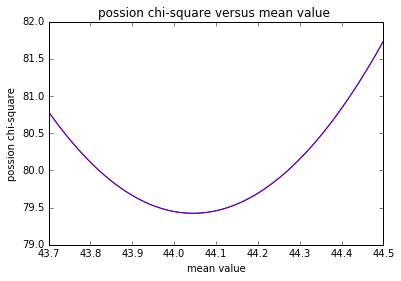

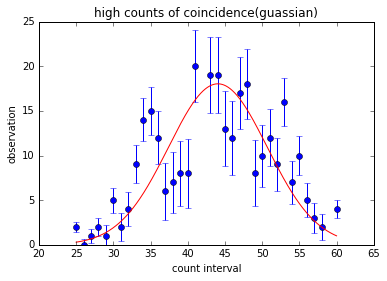

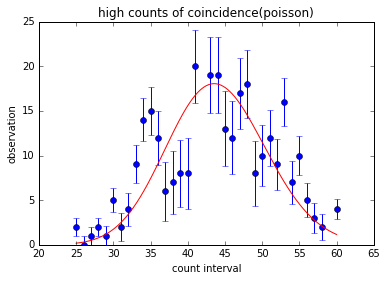

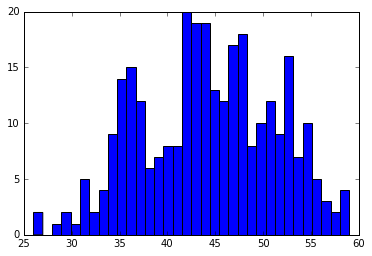

In [5]:
# high counts of coincidence
arr=genfromtxt("coincidenceh.txt")
arr=arr.astype(int)
m=amax(arr)
n=amin(arr)
h= m-n+1
b=[]
c=linspace(n-1,m+1,h)              # c reprensents count number
c=c.astype(int)
print 'count numbers: ',c
for i in range(n,m+1):
    a=0
    for j in range(0,300):
        if arr[j]==i:
            a=a+1 
    b.append(a)
b=array(b)                         # number of observation
print b
mean = sum(arr)/300.0                  # the mean value
print 'the mean value is:',mean
standard = std(arr)
print 'the standard deviation is :',standard # the standard deviation

k=linspace(43.7,44.5,81)
k=array(k)
print k


chips=[]
for i in range(0,81):
    p=k[i]
    chi=array(((b-P(c))**2/maximum(P(c),1)))
    chis=sum(chi)
    chips.append(chis)
chips=array(chips)
print chips

chipsm=amin(chips)
print 'the minimized chisquare of poisson:',chipsm
q=where(chips==chipsm)[0][0]
mp=k[q]
print 'the mean value (minimum chi-square) :',mp

figure(1)
x=k
y=chips
plt.plot(x,y)
plt.plot(x, y,color='purple')
plt.xlabel('mean value')
plt.ylabel('possion chi-square')
plt.title('possion chi-square versus mean value ')

figure(2)
s=(mp)**0.5
print 'the standard deviation is:',s
plt.title('high counts of coincidence(guassian)')
chig=array((b-Gm(c))**2/(Gm(c)))
chigs=sum(chig)
print 'the gaussian chi-square is:',chigs


x=c
y=b
yerr=sqrt(Gm(c))
plt.errorbar(x,y,yerr,fmt='o',color='blue')
plt.axis([20,65, 0, 25])

x = linspace(25,60,1000)
y=Gm(x) 
plt.plot(x, y,color='red')
plt.xlabel('count interval')
plt.ylabel('observation')

figure(3)

plt.title('high counts of coincidence(poisson)')
x=c
y=b
yerr=sqrt(maximum(Pm(c),1))
plt.errorbar(x,y,yerr,fmt='o',color='blue')
plt.axis([20,65, 0, 25])

x = linspace(25,60,1000)
y=Pm(x) #possion distribution
plt.plot(x, y,color='red')
plt.xlabel('count interval')
plt.ylabel('observation')
figure(4)
h=hist(arr,bins=34)
print 'the degree of freedom is:', len(c)-1

count numbers : [0 1 2 3 4 5 6 7]
observed times: [20 48 73 63 53 28 11  4]
the mean value is: 2.76333333333
the standard deviation is : 1.5876572538
[ 2.6   2.61  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69  2.7   2.71
  2.72  2.73  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81  2.82  2.83
  2.84  2.85  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95
  2.96  2.97  2.98  2.99  3.  ]
[ 6.5941344   6.13882426  5.70829833  5.30221069  4.92022573  4.56201792
  4.22727143  3.91567996  3.62694641  3.36078264  3.11690923  2.89505525
  2.69495804  2.51636293  2.35902311  2.22269937  2.1071599   2.01218013
  1.93754253  1.88303642  1.84845779  1.83360918  1.83829944  1.86234366
  1.90556296  1.96778435  2.0488406   2.14857012  2.2668168   2.40342988
  2.55826385  2.73117832  2.9220379   3.13071209  3.35707516  3.60100608
  3.86238838  4.14111007  4.43706356  4.75014553  5.08025687]
the minimized chisquare of poisson: 1.83360917684
the mean value (minimum chi-square) : 2.81
the st

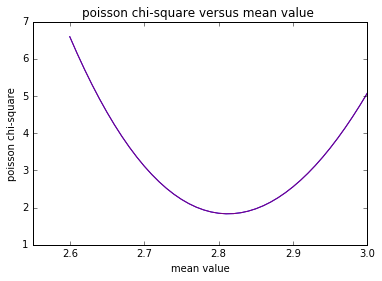

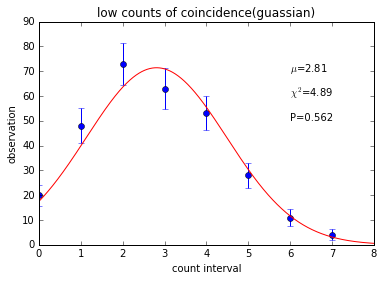

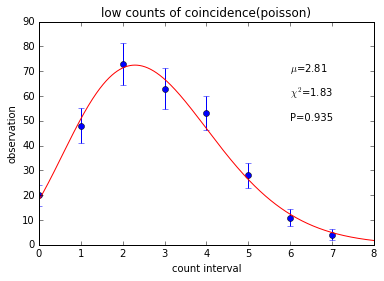

In [6]:
# low counts of coincidence
arr=genfromtxt("coincidencel.txt")
arr=arr.astype(int)
m=amax(arr)
n=amin(arr)
h= m-n+1
b=[]
c=linspace(n,m,h) 
c=c.astype(int)                        # c reprensents count number
print 'count numbers :',c
for i in range(n,m+1):
    a=0
    for j in range(0,300):
        if arr[j]==i:
            a=a+1 
    b.append(a)
    
b=array(b)                               # number of observation
print 'observed times:',b

mean = sum(arr)/300.0                  # the mean value
print 'the mean value is:',mean
standard = std(arr)
print 'the standard deviation is :',standard # the standard deviation

k=linspace(2.6,3,41)
k=array(k)
print k


chips=[]
for i in range(0,41):
    p=k[i]
    chi=array(((b-P(c))**2/P(c)))
    chis=sum(chi)
    chips.append(chis)
chips=array(chips)
print chips

chipsm=amin(chips)
print 'the minimized chisquare of poisson:',chipsm
q=where(chips==chipsm)[0][0]
mp=k[q]
print 'the mean value (minimum chi-square) :',mp

figure(1)
x=k
y=chips
plt.plot(x,y)
plt.plot(x, y,color='purple')
plt.xlabel('mean value')
plt.ylabel('poisson chi-square')
plt.title('poisson chi-square versus mean value ')

figure(2)
s=(mp)**0.5
print 'the standard deviation is:',s
plt.title('low counts of coincidence(guassian)')
chig=array(((b-Gm(c))**2/Gm(c)))
print chig
chigs=sum(chig)
print 'the gaussian chi-square is:',chigs

x=c
y=b
yerr=sqrt(Pm(x))
plt.errorbar(x,y,yerr,fmt='o',color='blue')

x = linspace(0,8,1000)
y=Gm(x) 
plt.plot(x, y,color='red')
plt.xlabel('count interval')
plt.ylabel('observation')

plt.text(6,70,r'$\mu $=%s' % mp)
plt.text(6,60,r'$\chi^2$=%s' %4.89)
plt.text(6,50,'P=0.562')

figure(3)

plt.title('low counts of coincidence(poisson)')
x=c
y=b
yerr=sqrt(Pm(x))
plt.errorbar(x,y,yerr,fmt='o',color='blue')

x = linspace(0,8,1000)
y=Pm(x) #possion distribution
plt.plot(x, y,color='red')
plt.xlabel('count interval')
plt.ylabel('observation')
print 'the degree of freedom is:', len(c)-1

plt.text(6,70,r'$\mu $=%s' % mp)
plt.text(6,60,r'$\chi^2$=%s' %1.83)
plt.text(6,50,'P=0.935')